# Plotting Sigmoid Function

### 2D Sigmoid

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [0]:
sigmoid(1,0.5,0)

0.6224593312018546

In [0]:
# Now plot curve

w = 0.9
b = 0.1
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

In [0]:
print("X type is ",type(X))
print("Y type is ",type(Y))

X type is  <class 'numpy.ndarray'>
Y type is  <class 'numpy.ndarray'>


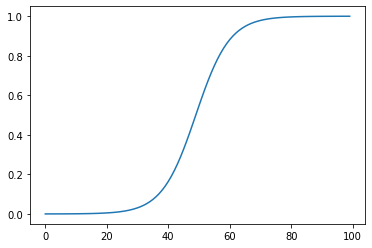

In [0]:
plt.plot(Y)

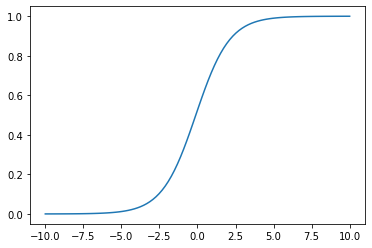

In [0]:
plt.plot(X,Y)
plt.show()

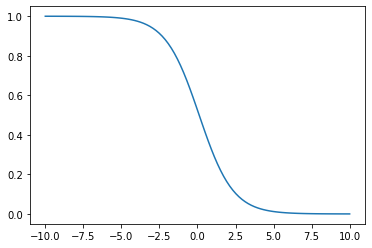

In [0]:
# Negative weight inverts sigmoid curve

w = -0.9
b = 0.1
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)
plt.plot(X,Y)
plt.show()

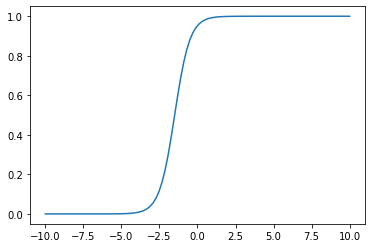

In [0]:
# Increasing bias (b) shifts curve to the left if w is positive and right if w is negative.

w = 2  #@param {type: "slider", min: -2, max: 2, step:0.1}
b = 3
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)
plt.plot(X,Y)
plt.show()

Basically, w decides rate of fall between the extremes.  
And b decides the position of the fall with respect to origin.

### 3D Sigmoid

In [0]:
def sigmoid_3d(x1, x2, w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [0]:
X1 = np.linspace(5,10,5)
X2=np.linspace(20,30,5)


XX1, XX2 = np.meshgrid(X1, X2) # Generates all possible combinations of X1 and X2 

In [0]:
X1

array([ 5.  ,  6.25,  7.5 ,  8.75, 10.  ])

In [0]:
X2

array([20. , 22.5, 25. , 27.5, 30. ])

In [0]:
XX1

array([[ 5.  ,  6.25,  7.5 ,  8.75, 10.  ],
       [ 5.  ,  6.25,  7.5 ,  8.75, 10.  ],
       [ 5.  ,  6.25,  7.5 ,  8.75, 10.  ],
       [ 5.  ,  6.25,  7.5 ,  8.75, 10.  ],
       [ 5.  ,  6.25,  7.5 ,  8.75, 10.  ]])

In [0]:
XX2

array([[20. , 20. , 20. , 20. , 20. ],
       [22.5, 22.5, 22.5, 22.5, 22.5],
       [25. , 25. , 25. , 25. , 25. ],
       [27.5, 27.5, 27.5, 27.5, 27.5],
       [30. , 30. , 30. , 30. , 30. ]])

In [0]:
w1 = 0.3
w2 = 0.5
b = 2
sigmoid_3d(XX1, XX2, w1, w2, b)

# Note : gives output for each input feature a value between 0 and 1 (the predicted value for that particular w1, w2, b)

array([[0.00247262, 0.01098694, 0.04742587, 0.18242552, 0.5       ],
       [0.02931223, 0.11920292, 0.37754067, 0.73105858, 0.92414182],
       [0.26894142, 0.62245933, 0.88079708, 0.97068777, 0.99330715],
       [0.81757448, 0.95257413, 0.98901306, 0.99752738, 0.99944722],
       [0.98201379, 0.99592986, 0.99908895, 0.99979657, 0.9999546 ]])

# Toy Dataset

In [0]:
class SigmoidNeuron:
  def __init__(self):
    self.w=None
    self.b=None
  
  def perceptron(self,x): #vectors
    return np.dot(x,self.w.T)+self.b

  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))

  def grad_w(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x

  def grad_b(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)

  def fit(self, X, Y, epochs = 1, lr = 1):
    self.w = np.random.randn(1,X.shape[1])
    self.b = 0

    for i in range(epochs):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw+=self.grad_w(x,y)
        db+=self.grad_b(x,y)
      self.w -= lr*dw
      self.b -= lr*db

In [0]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,-1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]
sn = SigmoidNeuron()

In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [0]:
sn.fit(X,Y,1,0.25)

In [0]:
def plot_sn(X,Y,sn):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray(X1[j],X2[j])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))